In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.signal import find_peaks, spectrogram, stft
from scipy.fft import fft
import librosa
import datetime

from goodvibes.utils.data import *
from goodvibes.signal import *

%matplotlib inline

In [2]:
# Read in files
sig_info = read_signature_information('../data/signature_information.csv')
run_info = read_target_run_log('../data/target-run-log.csv')
emplacement = read_emplacement_information('../data/emplacement_information.csv')

In [3]:
run_info

,location,date,run,make,model,year,type,target-name,target-id,speed-kph,...,east-start-turnaround-lat,east-start-turnaround-lon,west-start-turnaround-lat,west-start-turnaround-lon,north-start-turnaround-lat,north-start-turnaround-lon,south-start-turnaround-lat,south-start-turnaround-lon,stop-datetime,start-datetime
0,eglin,2023-03-16,1,Toyota,Tacoma,2006.0,SR5,2006 Toyota Tacoma SR5,1A,25.0,...,NaN,NaN,NaN,NaN,30.632192,-86.289292,30.613787,-86.281451,2023-03-16 13:37:45,2023-03-16 13:32:07
1,eglin,2023-03-16,1,Chevrolet,S-10,1995.0,NaN,1995 Chevrolet S-10,1B,25.0,...,NaN,NaN,NaN,NaN,30.632201,-86.289279,30.613409,-86.281255,2023-03-16 13:52:23,2023-03-16 13:46:28
2,cochise,2023-04-10,1,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,20.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-10 20:31:00,2023-04-10 20:29:00
3,cochise,2023-04-10,2,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,20.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-10 20:35:00,2023-04-10 20:33:00
4,cochise,2023-04-10,3,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,20.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-10 20:40:00,2023-04-10 20:38:00
5,cochise,2023-04-10,4,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,20.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-10 20:43:00,2023-04-10 20:41:00
6,cochise,2023-04-10,5,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,20.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-10 20:46:00,2023-04-10 20:44:00
7,cochise,2023-04-10,6,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,20.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-10 21:06:00,2023-04-10 21:04:00
8,cochise,2023-04-11,1,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,30.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-11 16:57:00,2023-04-11 16:56:00
9,cochise,2023-04-11,2,Toyota,4Runner,NaN,NaN,Toyota 4Runner,3A,30.0,...,31.620996,-110.238038,31.616278,-110.243520,NaN,NaN,NaN,NaN,2023-04-11 17:00:00,2023-04-11 16:59:00


In [24]:
adata = np.load('../data/targets/3A.10.121.acoustic.npy')
sdata = np.load('../data/targets/3A.10.121.seismic.npy')
distance = np.load('../data/targets/3A.10.121.distance.npy')
with open('../data/targets/2D.16.123.metadata.json', 'r') as f:
    meta = json.load(f)

sr = meta['acoustic_rate']

In [27]:
df1 = pd.DataFrame(adata, columns=['timestamp', 'acoustic'])
df2 = pd.DataFrame(sdata, columns=['timestamp', 'seismic'])
df3 = pd.DataFrame(distance, columns=['timestamp', 'distance'])

In [28]:
merged_df = pd.merge(df1, df2, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, df3, on='timestamp', how='outer')

In [60]:
merged_df = merged_df.iloc[200000:,:]

In [61]:
merged_df

,timestamp,acoustic,seismic,distance
450000,1.681233e+09,0.0,NaN,NaN
450001,1.681233e+09,1.0,NaN,NaN
450002,1.681233e+09,NaN,1.0,NaN
450003,1.681233e+09,-1.0,NaN,NaN
450004,1.681233e+09,0.0,NaN,NaN
...,...,...,...,...
686396,1.681233e+09,-1.0,NaN,NaN
686397,1.681233e+09,-1.0,NaN,NaN
686398,1.681233e+09,1.0,NaN,NaN
686399,1.681233e+09,0.0,NaN,NaN


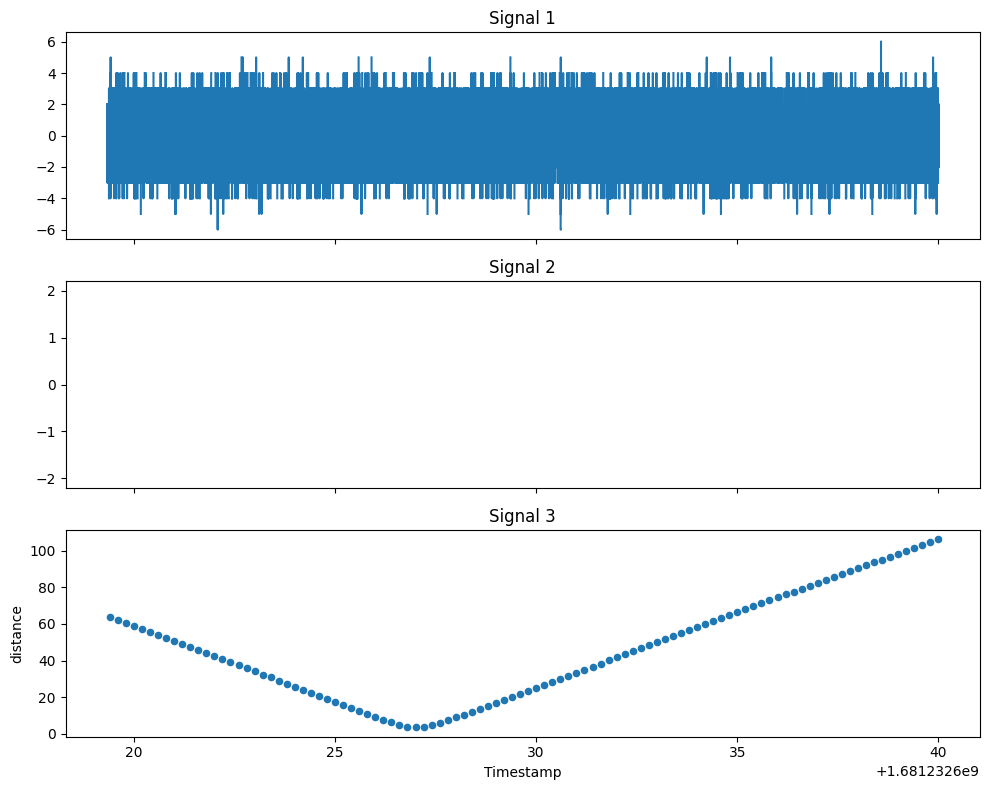

In [62]:
# Plot the signals
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))

# Plot each signal on a separate subplot
# Plot each signal on a separate subplot
merged_df.plot(x='timestamp', y='acoustic', ax=axes[0], kind='line', title='Signal 1', legend=False)
merged_df.plot(x='timestamp', y='seismic', ax=axes[1], kind='line', title='Signal 2', legend=False)
merged_df.plot(x='timestamp', y='distance', ax=axes[2], kind='scatter', title='Signal 3', legend=False)


# Set x-axis label for the bottom subplot
axes[2].set_xlabel('Timestamp')

# Display the plot
plt.tight_layout()
plt.show()

In [17]:
times = librosa.times_like(f0, sr=sr)

In [27]:
voiced_probs

array([0.01      , 0.01000021, 0.01000021, 0.01019108, 0.01000618,
       0.01      , 0.01000419, 0.01005297, 0.01000013, 0.01001876,
       0.01000123, 0.01000187, 0.01000021, 0.01000021, 0.01      ,
       0.01000052, 0.01000005, 0.01000001, 0.01000618, 0.01000021,
       0.01007375, 0.01000003, 0.01      , 0.01000282, 0.01005297,
       0.0100008 , 0.01025905, 0.01000618, 0.01      , 0.01108579,
       0.01007375, 0.01000033, 0.01007375, 0.0100008 , 0.01002672,
       0.01014005, 0.0100008 , 0.01000001, 0.01010197, 0.01001307,
       0.01      , 0.01000008, 0.01000003, 0.01000903, 0.01025905,
       0.01000013, 0.01000282, 0.01000419, 0.01      , 0.01000001,
       0.01001307, 0.01398021, 0.01108579, 0.01000282, 0.01      ,
       0.01      , 0.01000052, 0.01000013, 0.01000001, 0.01000033,
       0.01      , 0.01000618, 0.01046753, 0.01034906, 0.01      ,
       0.01000052, 0.01000033, 0.01002672, 0.01000123, 0.01000001,
       0.01002672, 0.01240312, 0.01003777, 0.01000001, 0.01   

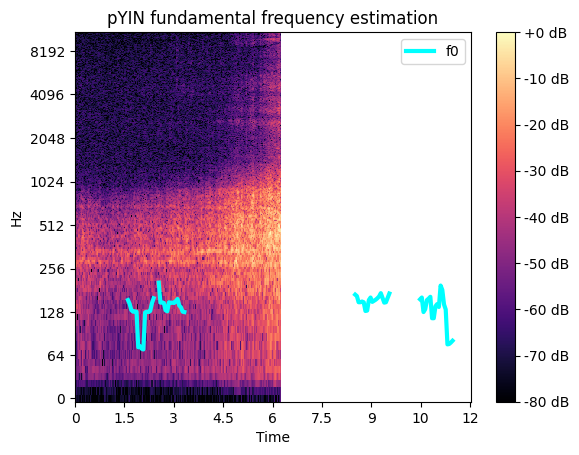

In [24]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(adata)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [20]:
D.shape

(1025, 270)

In [3]:
FRAME_SIZE_SEC = 1
HOP_SIZE_SEC = .8
#fs = meta['acoustic_rate']

def window_signal(data, rate, frame_size_sec, hop_size_sec):
    frame_size = int(np.round(frame_size_sec * rate))
    hop_size = int(np.round(hop_size_sec * rate))
    frames = []
    for start_idx in range(0, len(data), hop_size):
        end_idx = start_idx + frame_size
        window_data = data[start_idx:end_idx]
        window = np.hamming(len(window_data))
        windowed_frame = window_data * window
        frames.append(windowed_frame)
    return frames

In [39]:
aframes = window_signal(adata, meta['acoustic_rate'], FRAME_SIZE_SEC, HOP_SIZE_SEC)

In [40]:
f, t, Zxx = stft(aframes[30], fs=meta['acoustic_rate'], nperseg=256, noverlap=128)

In [41]:
def harmonic_product_spectrum(magnitude_spectrum, max_harmonics=5):
    HPS = magnitude_spectrum.copy()
    for k in range(2, max_harmonics + 1):
        downsampled = magnitude_spectrum[::k]
        HPS *= downsampled
    return HPS

In [37]:
# Calculate HPS for each time frame
[
    harmonic_product_spectrum(
        np.abs(
            fft(aframes[30][int(i * fs / 1000): int((i + 1) * fs / 1000)]))) for i in range(len(t))]

SyntaxError: unmatched ')' (2161302396.py, line 2)

array([0.        , 0.01297385, 0.0259477 , 0.03892155, 0.0518954 ,
       0.06486925, 0.0778431 , 0.09081695, 0.1037908 , 0.11676465,
       0.1297385 , 0.14271235, 0.1556862 , 0.16866004, 0.18163389,
       0.19460774, 0.20758159, 0.22055544, 0.23352929, 0.24650314,
       0.25947699, 0.27245084, 0.28542469, 0.29839854, 0.31137239,
       0.32434624, 0.33732009, 0.35029394, 0.36326779, 0.37624164,
       0.38921549, 0.40218934, 0.41516319, 0.42813704, 0.44111089,
       0.45408474, 0.46705859, 0.48003243, 0.49300628, 0.50598013,
       0.51895398, 0.53192783, 0.54490168, 0.55787553, 0.57084938,
       0.58382323, 0.59679708, 0.60977093, 0.62274478, 0.63571863,
       0.64869248, 0.66166633, 0.67464018, 0.68761403, 0.70058788,
       0.71356173, 0.72653558, 0.73950943, 0.75248328, 0.76545713,
       0.77843098, 0.79140482, 0.80437867, 0.81735252, 0.83032637,
       0.84330022, 0.85627407, 0.86924792, 0.88222177, 0.89519562,
       0.90816947, 0.92114332, 0.93411717, 0.94709102, 0.96006

In [4]:
data, rate, _ = read_wav(
    sig_info,
    131,
    'bprf',
    signatures_root_dir='../data/signatures/',
)

In [5]:
frames = window_signal(data, rate, 10, 9)

In [6]:
len(frames)

734

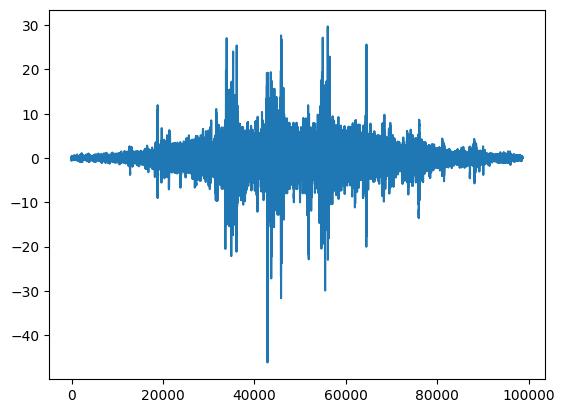

In [10]:
plt.plot(frames[100])